In [22]:
# importing in all required libraries
import yfinance as yf
import mlfinlab
from mlfinlab.portfolio_optimization.mean_variance import MeanVarianceOptimisation
from mlfinlab.portfolio_optimization.returns_estimators import ReturnsEstimators
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# downloading our data
data = yf.download("MSFT GOOG AMZN SPY FB OILK", start='2017-01-01', end='2020-01-01')

[*********************100%***********************]  6 of 6 completed


In [3]:
# quickly viewing our data format
data.head()

Adj Close                                                 \
                  AMZN          FB        GOOG       MSFT        OILK   
Date                                                                    
2017-01-03  753.669983  116.860001  786.140015  58.673244  100.678284   
2017-01-04  757.179993  118.690002  786.900024  58.410725  102.295425   
2017-01-05  780.450012  120.669998  794.020020  58.410725  103.404320   
2017-01-06  795.989990  123.410004  806.150024  58.917015  103.635345   
2017-01-09  796.919983  124.900002  806.650024  58.729496   99.800415   

                             Close                                     ...  \
                   SPY        AMZN          FB        GOOG       MSFT  ...   
Date                                                                   ...   
2017-01-03  209.785889  753.669983  116.860001  786.140015  62.580002  ...   
2017-01-04  211.033981  757.179993  118.690002  786.900024  62.299999  ...   
2017-01-05  210.866318  780.450012  120.669998  794.020020  62.299999  ...   
2017-01-06  211.620728  795.989990  123.410004  806.150024  62.840000  ...   
2017-01-09  210.922211  796.919983  124.900002  806.650024  62.639999  ...   

                  Open                                      Volume            \
                  GOOG       MSFT        OILK         SPY     AMZN        FB   
Date                                                                           
2017-01-03  778.809998  62.790001  114.699997  225.039993  3521100  20663900   
2017-01-04  788.359985  62.480000  109.449997  225.619995  2510500  19630900   
2017-01-05  786.080017  62.189999  111.900002  226.270004  5830100  19492200   
2017-01-06  795.260010  62.299999  112.199997  226.529999  5986200  28545300   
2017-01-09  806.400024  62.759998  110.099998  226.910004  3446100  22880400   

                                               
               GOOG      MSFT  OILK       SPY  
Date                                           
2017-01-03  1657300  20694100  1000  91366500  
2017-01-04  1073000  21340000   800  78744400  
2017-01-05  1335200  24876000   700  78379000  
2017-01-06  1640200  19922900   200  71559900  
2017-01-09  1274600  20382700  1300  46939700  

[5 rows x 36 columns]

In [4]:
# formatting our data to only get the closing prices of each day
data = data['Close']

In [5]:
# formatting our data to flip all rows
data = data.iloc[::-1]

data.head()

,AMZN,FB,GOOG,MSFT,OILK,SPY
Date,,,,,,
2019-12-31,1847.839966,205.250000,1337.020020,157.699997,110.660004,321.859985
2019-12-30,1846.890015,204.410004,1336.140015,157.589996,111.449997,321.079987
2019-12-27,1869.800049,208.100006,1351.890015,158.960007,111.625000,322.859985
2019-12-26,1868.770020,207.789993,1360.400024,158.669998,111.500000,322.940002
2019-12-24,1789.209961,205.119995,1343.560059,157.380005,110.360001,321.230011


In [6]:
# Calculating our mean asset returns
mean_returns = ReturnsEstimators.calculate_mean_historical_returns(data)
mean_returns

AMZN   -0.262590
FB     -0.144630
GOOG   -0.150834
MSFT   -0.285674
OILK    0.035169
SPY    -0.111096
dtype: float64

In [7]:
# calculating our asset returns so our data is stationary 
# we are doing this to calculate our covariance matrix
returns = ReturnsEstimators.calculate_returns(data)
returns.head()

,AMZN,FB,GOOG,MSFT,OILK,SPY
Date,,,,,,
2019-12-30,-0.000514,-0.004093,-0.000658,-0.000698,0.007139,-0.002423
2019-12-27,0.012405,0.018052,0.011788,0.008694,0.001570,0.005544
2019-12-26,-0.000551,-0.001490,0.006295,-0.001824,-0.001120,0.000248
2019-12-24,-0.042573,-0.012850,-0.012379,-0.008130,-0.010224,-0.005295
2019-12-23,0.002118,0.005168,0.003930,0.000191,-0.004168,-0.000031


In [8]:
# calculating our covariance matrix
cov = returns.cov()
cov

,AMZN,FB,GOOG,MSFT,OILK,SPY
AMZN,0.000296,0.000191,0.000174,0.000172,0.000056,0.000098
FB,0.000191,0.000358,0.000165,0.000137,0.000040,0.000084
GOOG,0.000174,0.000165,0.000214,0.000145,0.000043,0.000088
MSFT,0.000172,0.000137,0.000145,0.000186,0.000047,0.000090
OILK,0.000056,0.000040,0.000043,0.000047,0.000322,0.000043
SPY,0.000098,0.000084,0.000088,0.000090,0.000043,0.000066


In [20]:
# calculating our optimal portfolio
mvo = MeanVarianceOptimisation()

mvo.allocate(asset_names=data.columns,
             asset_prices=data,
             expected_asset_returns=mean_returns,
             covariance_matrix=cov,
             target_risk=0.3,
             solution='inverse_variance')

print(mvo.weights)

       AMZN        FB      GOOG      MSFT      OILK       SPY
0  0.098178  0.081286  0.136155  0.156196  0.090375  0.437809


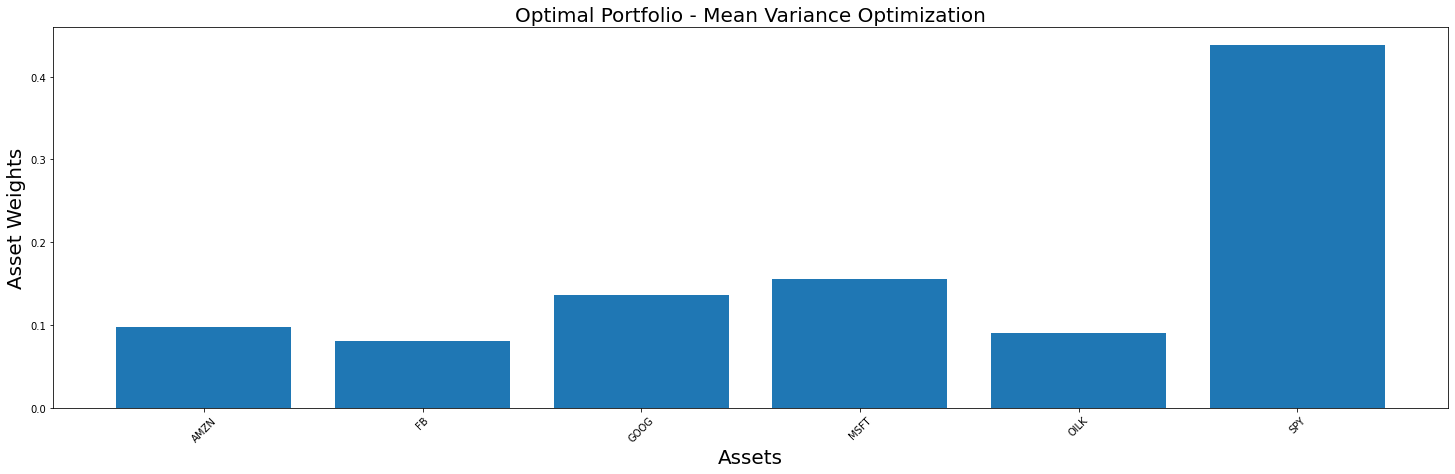

In [24]:
# plotting our optimal portfolio
weights = mvo.weights
y_pos = np.arange(len(weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(weights.columns), weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('Optimal Portfolio - Mean Variance Optimization', size=20)
plt.show()